# Explore Clean STU QQQ

In [75]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# takes about 1 minute to load
df_student = pd.read_csv('cleaned_data/clean_STU_QQQ.tsv', sep='\t', header=0, index_col=0, dtype={"LANGTEST_PAQ": "object"})
new_nan_values_count = df_student.isnull().sum().sum()
assert new_nan_values_count == 34114739, f"Failed check having {new_nan_values_count} NaNs"

In [58]:
df_student["CNTSTUID"] = df_student["CNTSTUID"].astype("string")
df_student = df_student.set_index(["CNTSTUID"])
df_student.shape

(613744, 1277)

In [59]:
df_student

,CNT,CNTRYID,CNTSCHID,CYC,NatCen,STRATUM,SUBNATIO,REGION,OECD,ADMINMODE,...,PV3MPRE,PV4MPRE,PV5MPRE,PV6MPRE,PV7MPRE,PV8MPRE,PV9MPRE,PV10MPRE,SENWT,VER_DAT
CNTSTUID,,,,,,,,,,,,,,,,,,,,,
800001.0,Albania,Albania,800282.0,08MS,Albania,ALB - stratum 03: Urban / Center / Public,Albania,Albania,1,0,...,226.250,203.029,219.817,331.017,223.752,305.671,230.156,289.436,0.55561,03MAY23:10:11:25
800002.0,Albania,Albania,800115.0,08MS,Albania,ALB - stratum 03: Urban / Center / Public,Albania,Albania,1,0,...,298.644,321.405,320.452,284.836,364.565,304.044,347.626,352.269,0.76431,03MAY23:10:11:25
800003.0,Albania,Albania,800242.0,08MS,Albania,ALB - stratum 01: Urban / North / Public,Albania,Albania,1,0,...,383.340,376.019,285.901,289.896,338.469,316.296,324.361,343.351,1.37877,03MAY23:10:11:25
800005.0,Albania,Albania,800245.0,08MS,Albania,ALB - stratum 08: Rural / Center / Public,Albania,Albania,1,0,...,264.532,303.422,327.793,165.575,246.156,238.322,275.860,227.466,1.49361,03MAY23:10:11:26
800006.0,Albania,Albania,800285.0,08MS,Albania,ALB - stratum 03: Urban / Center / Public,Albania,Albania,1,0,...,399.300,514.739,539.850,461.793,514.465,510.462,490.537,503.793,0.65249,03MAY23:10:11:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86007488.0,Uzbekistan,Uzbekistan,86000120.0,08MS,Uzbekistan,UZB - stratum 26: Khorezm/Rural,Uzbekistan,Uzbekistan,1,0,...,334.153,306.551,271.135,386.969,376.271,368.287,395.329,278.263,0.71987,02MAY23:13:18:15
86007489.0,Uzbekistan,Uzbekistan,86000140.0,08MS,Uzbekistan,UZB - stratum 04: Andijan/Rural,Uzbekistan,Uzbekistan,1,0,...,272.456,335.952,232.583,179.328,233.470,203.001,254.340,233.187,0.65541,02MAY23:13:18:13
86007490.0,Uzbekistan,Uzbekistan,86000024.0,08MS,Uzbekistan,UZB - stratum 10: Kashkadarya/Rural,Uzbekistan,Uzbekistan,1,0,...,395.368,451.614,432.586,387.329,456.236,424.790,408.986,460.542,0.67910,02MAY23:13:18:13


In [63]:
df = df_student[df_student.columns.drop(list(df_student.filter(regex='W_')))]
df = df[df.columns.drop(list(df.filter(regex='PV')))]
df = df.merge(
    df_student.filter(regex='^PV1[A-Z]+$'),
    how="inner",
    left_index=True,
    right_index=True,
)
df = df.drop(["SENWT", "VER_DAT"], axis=1)
df = df.select_dtypes(exclude="object")

In [64]:
df

,CNTSCHID,OECD,ADMINMODE,Option_CT,Option_FL,Option_ICTQ,Option_WBQ,Option_PQ,Option_TQ,Option_UH,...,PV1READ,PV1SCIE,PV1MCCR,PV1MCQN,PV1MCSS,PV1MCUD,PV1MPEM,PV1MPFS,PV1MPIN,PV1MPRE
CNTSTUID,,,,,,,,,,,,,,,,,,,,,
800001.0,800282.0,1,0,0,1,0,1,1,1,1,...,247.571,335.468,117.551,162.813,137.900,143.560,217.452,236.844,237.157,225.788
800002.0,800115.0,1,0,0,1,0,1,1,1,1,...,258.472,315.021,276.566,230.918,210.080,260.254,433.093,421.161,330.815,413.449
800003.0,800242.0,1,0,0,1,0,1,1,1,1,...,284.670,358.675,308.081,303.055,332.305,263.903,339.368,268.326,334.385,365.307
800005.0,800245.0,1,0,0,1,0,1,1,1,1,...,321.547,214.823,276.431,378.220,341.161,381.271,275.206,351.882,330.878,279.983
800006.0,800285.0,1,0,0,1,0,1,1,1,1,...,464.366,434.997,491.620,429.415,461.240,490.958,449.338,445.999,484.732,455.587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86007488.0,86000120.0,1,0,0,1,1,1,1,1,1,...,315.903,265.316,345.753,271.000,223.923,272.835,274.281,367.102,320.597,328.863
86007489.0,86000140.0,1,0,0,1,1,1,1,1,1,...,278.035,294.882,261.229,336.972,309.332,292.048,315.947,302.095,280.462,258.670
86007490.0,86000024.0,1,0,0,1,1,1,1,1,1,...,310.081,392.258,432.574,437.849,403.790,405.214,410.467,450.728,318.612,422.531


In [65]:
df.describe()

,CNTSCHID,OECD,ADMINMODE,Option_CT,Option_FL,Option_ICTQ,Option_WBQ,Option_PQ,Option_TQ,Option_UH,...,PV1READ,PV1SCIE,PV1MCCR,PV1MCQN,PV1MCSS,PV1MCUD,PV1MPEM,PV1MPFS,PV1MPIN,PV1MPRE
count,6.137440e+05,613744.000000,613744.000000,613744.000000,613744.000000,613744.000000,613744.000000,613744.000000,613744.000000,613744.000000,...,613744.000000,613744.000000,592123.000000,592123.000000,592123.000000,592123.000000,592123.000000,592123.000000,592123.000000,592123.000000
mean,4.348123e+07,0.519088,0.035228,0.185584,0.678504,0.358679,0.779472,0.812288,0.763660,0.829004,...,438.224714,450.462455,442.306982,442.707770,439.797035,443.369787,442.761379,440.572725,443.556393,442.120021
std,2.558506e+07,0.499636,0.184356,0.388771,0.467051,0.479613,0.414603,0.390482,0.424833,0.376506,...,109.507625,105.243625,108.175677,106.826669,111.364060,109.589706,106.559966,111.878487,108.170495,107.122395
min,8.000010e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,15.290000,32.040000,0.000000,0.000000,0.000000
25%,2.140006e+07,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,357.226750,371.712000,362.459500,363.437500,360.537500,363.251000,363.924000,359.034500,364.134000,363.949500
50%,3.980055e+07,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,434.961500,444.464000,435.934000,434.965000,434.378000,436.511000,434.937000,432.905000,436.774000,437.116000
75%,6.880013e+07,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,516.484250,524.734250,516.924500,515.547000,515.371000,517.800000,514.924000,516.220000,517.645000,516.816500
max,9.010018e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,938.681000,895.375000,941.225000,929.886000,979.576000,933.695000,944.409000,1000.000000,949.725000,926.436000


In [12]:
# takes over 13 minutes
corr = df.corr()

In [13]:
corr

,CNTSCHID,CNTSTUID,OECD,ADMINMODE,Option_CT,Option_FL,Option_ICTQ,Option_WBQ,Option_PQ,Option_TQ,...,PV1READ,PV1SCIE,PV1MCCR,PV1MCQN,PV1MCSS,PV1MCUD,PV1MPEM,PV1MPFS,PV1MPIN,PV1MPRE
CNTSCHID,1.000000,0.999554,0.065714,0.006715,0.095479,-0.020600,0.091135,-0.231376,0.221840,0.121359,...,0.003441,0.015931,0.022197,0.027114,0.013234,0.025249,0.022267,0.020013,0.025388,0.025257
CNTSTUID,0.999554,1.000000,0.063619,0.007173,0.096959,-0.022447,0.093307,-0.233638,0.221583,0.120482,...,0.003632,0.015925,0.022349,0.027159,0.013273,0.025453,0.022360,0.020039,0.025510,0.025483
OECD,0.065714,0.063619,1.000000,0.183927,-0.058630,0.278971,0.263813,0.103011,0.063934,-0.176860,...,-0.349682,-0.338201,-0.285945,-0.296602,-0.291495,-0.301107,-0.290273,-0.268931,-0.309766,-0.313853
ADMINMODE,0.006715,0.007173,0.183927,1.000000,0.400299,0.131536,0.255515,0.101640,0.091859,0.106304,...,-0.089600,-0.103807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Option_CT,0.095479,0.096959,-0.058630,0.400299,1.000000,0.173228,-0.007007,0.197615,0.099050,0.141163,...,0.018213,-0.003039,0.028588,0.039965,0.031724,0.036337,0.031494,0.031027,0.035069,0.045724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PV1MCUD,0.025249,0.025453,-0.301107,NaN,0.036337,-0.103994,-0.167226,-0.055264,-0.009025,0.087219,...,0.771249,0.810999,0.867412,0.886933,0.811217,1.000000,0.841746,0.807257,0.851131,0.823945
PV1MPEM,0.022267,0.022360,-0.290273,NaN,0.031494,-0.089095,-0.170125,-0.043915,-0.007866,0.090494,...,0.773122,0.821514,0.851355,0.878065,0.794700,0.841746,1.000000,0.873227,0.899568,0.882996
PV1MPFS,0.020013,0.020039,-0.268931,NaN,0.031027,-0.079835,-0.163724,-0.034515,-0.003665,0.085386,...,0.725290,0.779631,0.815418,0.830667,0.770998,0.807257,0.873227,1.000000,0.855276,0.846137
PV1MPIN,0.025388,0.025510,-0.309766,NaN,0.035069,-0.101524,-0.169931,-0.053416,-0.007589,0.090856,...,0.782397,0.823704,0.844443,0.854911,0.788774,0.851131,0.899568,0.855276,1.000000,0.869477


<Axes: >

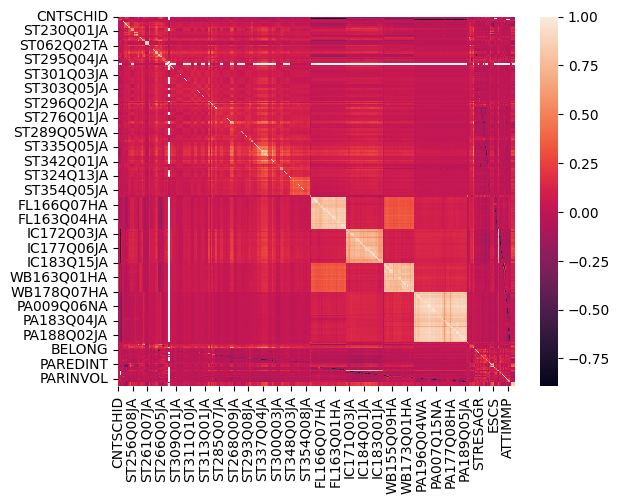

In [14]:
sns.heatmap(corr)

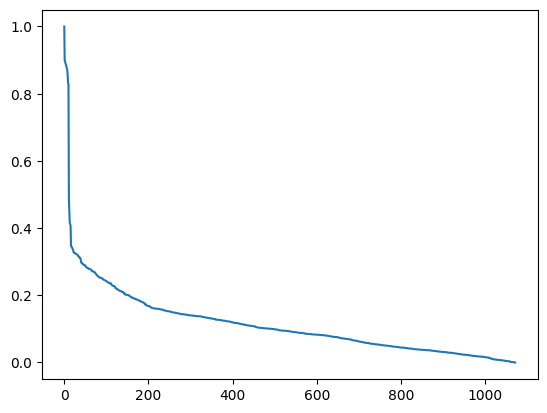

In [27]:
plt.plot(corr["PV1MATH"].abs().sort_values(ascending=False).values)

In [36]:
corr["PV1MATH"].abs().sort_values(ascending=False).head(20)

PV1MATH       1.000000
PV1MCQN       0.898014
PV1MPEM       0.896576
PV1SCIE       0.888860
PV1MPIN       0.887176
PV1MCCR       0.880086
PV1MCUD       0.876917
PV1MPRE       0.871589
PV1MPFS       0.856231
PV1READ       0.831251
PV1MCSS       0.827974
HOMEPOS       0.484310
ESCS          0.451405
MATHEFF       0.416389
ST253Q01JA    0.410742
ICTRES        0.408147
HISEI         0.347900
IC177Q07JA    0.344245
IC178Q07JA    0.343492
FAMCON        0.340021
Name: PV1MATH, dtype: float64

In [156]:
col_names = corr["PV1MATH"].abs().sort_values(ascending=False).head(200)
col_names

PV1MATH       1.000000
PV1MCQN       0.898014
PV1MPEM       0.896576
PV1SCIE       0.888860
PV1MPIN       0.887176
                ...   
FCFMLRTY      0.170499
FL170Q04JA    0.169505
IC173Q04JA    0.169323
WB152Q01HA    0.168701
IC171Q06JA    0.168688
Name: PV1MATH, Length: 200, dtype: float64

## Train Model

In [174]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

X = df[col_names.index].drop(columns=["PV1MATH"])
y = label_encoder.fit_transform(pd.qcut(df['PV1MATH'], q=5))

In [175]:
y

array([0, 0, 0, ..., 2, 0, 1])

In [176]:
X

,PV1MCQN,PV1MPEM,PV1SCIE,PV1MPIN,PV1MCCR,PV1MCUD,PV1MPRE,PV1MPFS,PV1READ,PV1MCSS,...,ST327Q04JA,IC172Q01JA,ST250Q02JA,ST038Q09JA,ST292Q05JA,FCFMLRTY,FL170Q04JA,IC173Q04JA,WB152Q01HA,IC171Q06JA
CNTSTUID,,,,,,,,,,,,,,,,,,,,,
800001.0,162.813,217.452,335.468,237.157,117.551,143.560,225.788,236.844,247.571,137.900,...,-1,1,0,3,0,-1,-1,4,NaN,-1
800002.0,230.918,433.093,315.021,330.815,276.566,260.254,413.449,421.161,258.472,210.080,...,-1,3,1,3,-1,-1,-1,4,NaN,0
800003.0,303.055,339.368,358.675,334.385,308.081,263.903,365.307,268.326,284.670,332.305,...,-1,-1,0,-1,-1,-1,-1,-1,NaN,-1
800005.0,378.220,275.206,214.823,330.878,276.431,381.271,279.983,351.882,321.547,341.161,...,-1,2,0,3,1,-1,-1,2,NaN,5
800006.0,429.415,449.338,434.997,484.732,491.620,490.958,455.587,445.999,464.366,461.240,...,-1,1,0,3,2,-1,-1,5,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86007488.0,271.000,274.281,265.316,320.597,345.753,272.835,328.863,367.102,315.903,223.923,...,-1,-1,0,3,1,-1,-1,-1,NaN,-1
86007489.0,336.972,315.947,294.882,280.462,261.229,292.048,258.670,302.095,278.035,309.332,...,-1,-1,1,3,-1,-1,-1,-1,NaN,-1
86007490.0,437.849,410.467,392.258,318.612,432.574,405.214,422.531,450.728,310.081,403.790,...,-1,-1,1,2,2,-1,-1,-1,NaN,-1


In [177]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [178]:
#  handle NaNs

from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X_train)

X_train = imp.transform(X_train)
X_test = imp.transform(X_test)

In [179]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = make_pipeline(StandardScaler(), RandomForestClassifier(
    max_depth=5, n_estimators=10, max_features=1, random_state=42
))
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

y_pred = clf.predict(X_test)

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.4438


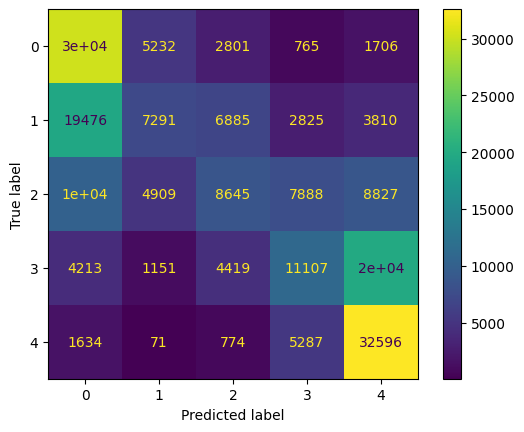

In [180]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()